In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect on existing database into a new model
Base = automap_base()

In [7]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

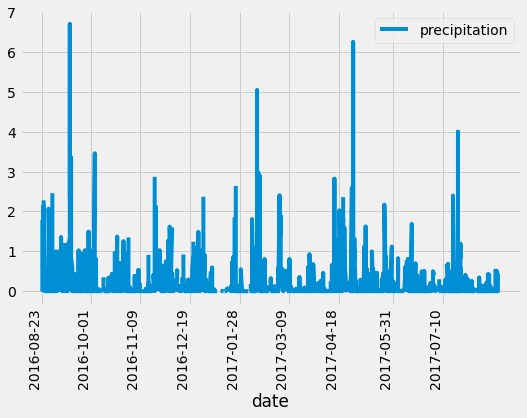

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp)
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.set_index(df['date'], inplace=True)
# Sort the dataframe by date
df = df.sort_index()
# print(df.to_string(index=False)) 
# Use Pandas Plotting with Matplotlib to plot the data 
# fre=pd.date_range(start=df['date'][0], end=df['date'][-2],freq='39d')

ax = df.plot(x = 'date',rot = 90, figsize = (8,6))
ax.set_xticks(['2016-08-23','2016-10-01','2016-11-09','2016-12-19','2017-01-28','2017-03-09','2017-04-18','2017-05-31','2017-07-10'])
plt.legend(loc = 'upper right')

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# see tables columns names
query=session.query(Measurement)
query.statement.columns.keys()

# see attributes
dir(Measurement)
dir(session.query(Measurement))

C:\Users\lmeji\AppData\Local\Temp\ipykernel_8484\607291141.py:3: SADeprecationWarning: The SelectBase.c and SelectBase.columns attributes are deprecated and will be removed in a future release; these attributes implicitly create a subquery that should be explicit.  Please call SelectBase.subquery() first in order to create a subquery, which then contains this attribute.  To access the columns that this SELECT object SELECTs from, use the SelectBase.selected_columns attribute. (deprecated since: 1.4)
  query.statement.columns.keys()


['__class__',
 '__clause_element__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_context_option',
 '_aliased_generation',
 '_annotate',
 '_annotations',
 '_annotations_cache_key',
 '_assert_no_memoizations',
 '_auto_correlate',
 '_bind',
 '_clone',
 '_clone_annotations_traverse_internals',
 '_compile_context',
 '_compile_options',
 '_compile_state',
 '_correlate',
 '_current_path',
 '_deannotate',
 '_distinct',
 '_distinct_on',
 '_effective_plugin_target',
 '_enable_assertions',
 '_entity_from_pre_ent_zero',
 '_executable_traverse_internals',
 '_execution_options',
 '_filter_by_zero',
 '_final_statement',
 '_for_update_arg',
 '_fr

In [14]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

In [15]:
# What are the most active stations?
# List the stations and the counts in descending order. "\" change a line
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

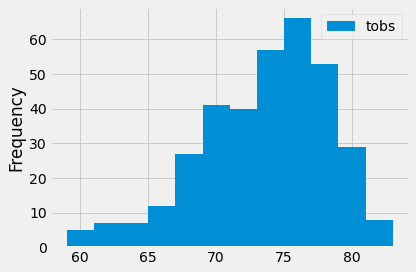

In [17]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
# create a dataframe
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()

In [18]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):

    # Query the minimum, average and maximum temperatures
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()